# Análisis de datos con Python.
# Introducción
### - Importar librerías de python

In [4]:
import requests
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(URL, header=None)  # Nuestro dataset no tiene cabecera
df.head()  # visualización de las primeras 5 filas del dataset


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Preprocesamiento de datos
### - Asignación de encabezados.

In [5]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
df.columns = headers  # remplazo el encabezado de las columnas por mi lista de headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### - Conociendo el dataset

In [6]:
df.dtypes  # visualización de los tipos de datos de cada columna

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
df.describe()  # descripción estadística de las columnas numéricas

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
# si deseo conocer estadísticas de todas las columnas, incluyendo las no numéricas
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Pre-procesamiento de datos (data cleaning, data wrangling)

### - *manejo de valores nulos*

In [9]:
df.replace("?", np.nan, inplace=True)  # remplazo los valores "?" por numpy not a number
df.isnull().sum()  # visualización de la cantidad de valores nulos por columna

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df = df.dropna(subset=["price"], axis=0)  # elimino las filas (index=0) con valores nulos en la columna "price"

# convierto la columna a tipo float
df["normalized-losses"] = df["normalized-losses"].astype(float)  
df["stroke"] = df["stroke"].astype(float)
df["bore"] = df["bore"].astype(float)
df["horsepower"] = df["horsepower"].astype(float)
df["peak-rpm"] = df["peak-rpm"].astype(float)

# reemplazo los valores nulos por la media
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].mean())  
df["stroke"] = df["stroke"].fillna(df["stroke"].mean())
df["bore"] = df["bore"].fillna(df["bore"].mean())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].mean())

# reemplazo los valores nulos por frecuencia
df["num-of-doors"] = df["num-of-doors"].fillna('four')

### - *formateo de datos*

In [11]:
df["city-mpg"] = 235 / df["city-mpg"]  # convierto mpg a L/100km
df.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)

### - *Normalización de datos*

Distintas formas para normalizar datos:

![](img/normalizacion.png)

In [12]:
# normalización por el método "simple feature scaling"
df["length"] = df["length"] / df["length"].max()

# normalización por el método "min-max"
df["width"] = df["width"] - df["width"].min() / df["width"].max() - df["width"].min()

# normalización por el método "z-score"
df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()

### - *agrupamiento* conocido como *binning*

![img](img/binning.png)

In [13]:
print(df["price"].dtype)  # necesitamos corregir primero el tipo de datos
df["price"] = df["price"].astype(float)  # convierto la columna a tipo float


object


In [14]:
bins_price = np.linspace(min(df["price"]), max(df["price"]), 4)  # divido los datos en 4 intervalos
group_names = ["Low", "Medium", "High"]  # etiquetas para cada intervalo
df["price-binned"] = pd.cut(df["price"], bins_price, labels=group_names, include_lowest=True)

# realizo la misma acción para la columna "horsepower"
bins_horsepower = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
df["horsepower-binned"] = pd.cut(df["horsepower"], bins_horsepower, labels=group_names, include_lowest=True)

In [15]:
df["price-binned"].value_counts()  # visualización de la cantidad de valores por intervalo

price-binned
Low       171
Medium     18
High       12
Name: count, dtype: int64

In [16]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

### - *conversión de variables categóricas a variables cuantitativas*

![](img/conversion.png)

In [17]:
df["fuel-type"].unique()  # deseo convertir esta variables a un dato númerico.

array(['gas', 'diesel'], dtype=object)

In [18]:
dummy_df = pd.get_dummies(df["fuel-type"])  # convierto la variable categórica a una variable dummy (TRUE/FALSE)
dummy_df[["gas", "diesel"]] = dummy_df[["gas", "diesel"]].astype(int)  # convierto la columna a tipo int
dummy_df.head(2)

,diesel,gas
0,0,1
1,0,1


In [19]:
df = pd.concat([df, dummy_df], axis=1)  # concateno el dataframe original con el dataframe dummy
df.drop("fuel-type", axis=1, inplace=True)  # elimino la columna original

### - *Guardar dataframe en un archivo localmente*

In [20]:
df.to_csv("output/clean_df.csv", index=False)  # guardo el dataframe en un archivo csv

# Análisis exploratorio (EDA)

¿Que características impactan más en el precio de un auto?

### - *Estadística descriptiva*

In [21]:
df.describe()  # computa estadísticas básicas para todas las columnas numéricas.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,4.751555,4.949054e-16,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,9.944145,30.686567,13207.129353,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,2.101471,1.000000e+00,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,2.534599,6.815150,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,-0.837500,-2.437541e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,2.962500,-7.217300e-01,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,4.362500,1.361755e-01,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,9.791667,30.000000,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,5.462500,7.081124e-01,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,10.862500,2.464776e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,54.000000,45400.000000,1.000000,1.000000


In [22]:
df["drive-wheels"].value_counts()  # visualización de la cantidad de valores por categoría

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Text(0, 0.5, 'Price')

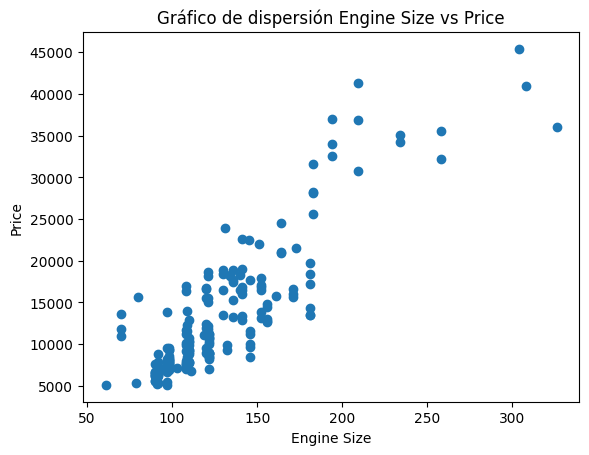

In [23]:
%matplotlib inline

y = df["price"]
x = df["engine-size"]
plt.scatter(x, y)
plt.title("Gráfico de dispersión Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

### - *Grouping data*

¿Existe relación entre los diferentes sistemas de dirección y el precio del vehículo?. 

In [24]:
df_test = df[["drive-wheels", "body-style", "price"]]  # selecciono las columnas de interés
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()  # agrupo por las columnas seleccionadas
df_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Podemos obervar de la tabla anterior, que la información no se presenta de forma muy legible. Por lo tanto vamos a utilizar el método pivot de pandas para llevarlo a un formato más parecido a hojas de cálculo.

In [25]:
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")  # convierto el dataframe en una tabla pivote
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### - *Análisis de varianza* (ANOVA)

Buscamos correlación entre diferentes grupos de variables categóricas. Obtenemos dos datos:
+ puntaje F-test: calcula la relación de variación entre la media de los grupos sobre la variación dentro de cada unos de los grupos de la muestra.
+ valor p: nivel de confianza

Puedes aprender más [aquí](https://www.datacamp.com/tutorial/anova-test)

In [26]:
df_anova = df[["make", "price"]]  # selecciono las columnas de interés
grouped_anova = df_anova.groupby(["make"])  # agrupo por la columna "make"
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])


print("ANOVA results: F=", anova_results_1[0], ", P=", anova_results_1[1])

ANOVA results: F= 0.19744030127462606 , P= 0.6609478240622193


/tmp/ipykernel_6940/2903785749.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
/tmp/ipykernel_6940/2903785749.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])


### - *Correlación*

Text(0.5, 1.0, 'Ejemplo de correlación positiva')

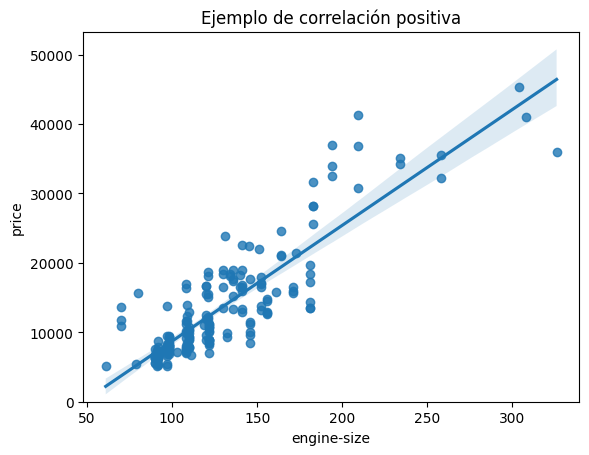

In [27]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.title("Ejemplo de correlación positiva")

Text(0.5, 1.0, 'Ejemplo de correlación negativa')

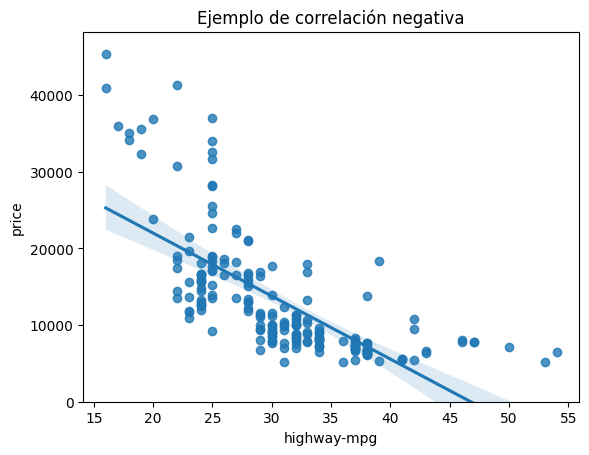

In [28]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title("Ejemplo de correlación negativa")

Text(0.5, 1.0, 'Ejemplo de correlación nula')

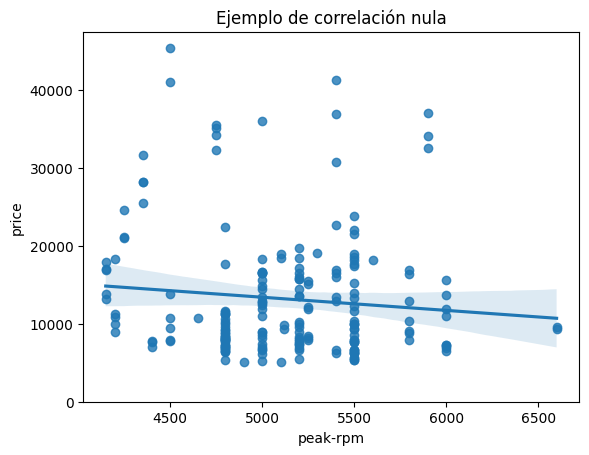

In [29]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.title("Ejemplo de correlación nula")

### - *Correlación Pearson*
![imagen](img/correlacion_pearson.png)

In [30]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])  # coeficiente de correlación de Pearson
print(f"Coeficiente: {pearson_coef}")
print(f"Valor p: {p_value}")

Coeficiente: 0.8096811975632285
Valor p: 6.058444649710618e-48


In [31]:
df[['horsepower', 'price']].corr()  # coeficiente de correlación de Pearson

,horsepower,price
horsepower,1.000000,0.809681
price,0.809681,1.000000


<Axes: xlabel='drive-wheels', ylabel='price'>

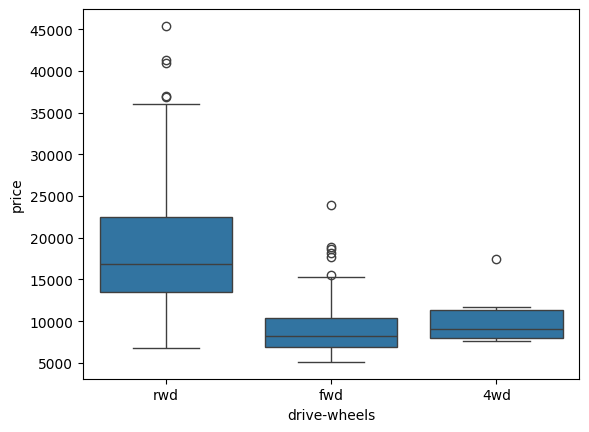

In [32]:
sns.boxplot(x="drive-wheels", y="price", data=df)

### Conclusión

Ahora tenemos una mejor idea de que variables son importantes a tener en cuenta a la hora de analizar los precios de autos:

Variables numéricas:

+ Length
+ Width
+ Curb-weight
+ Engine-size
+ Horsepower
+ City-mpg
+ Highway-mpg
+ Wheel-base
+ Bore

Variables categóricas:

+ Drive-wheels

A medida que avancemos en la construcción de modelos de machine learning, retroalimentar al modelo con variables significativas que afectan nuestra variable target "price" mejorará la performance del modelo.

# Desarrollo de un modelo

Un modelo puede ser pensado como una ecuación matemática utilizada para predecir un valor, utilizando otro u otros valores. Por ejemplo:

![](img/model1.png)

### - *Regresión Lineal Simple*

Para determinar una recta, tomamos puntos de nuestro dataset, usamos estos puntos para entrenar y ajustar a nuestro modelo. Los resultados de los puntos de entrenamiento son los parámetros. Utilizamos estos parámetro en nuestro modelo (regresión lineal ) yˆ = b0 + b1 x. Utilizamos este modelo para predecir valores que no tenemos en el dataset

![](img/slr.png)

![](img/slr_formula.png)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df[["highway-mpg"]]  # variable independiente (predictor)
Y = df["price"]  # variable dependiente (target)
lm.fit(X, Y)  # ajusto el modelo lineal
print("Ordenada al origen b0: ", lm.intercept_)
print("Pendiente b1: ", lm.coef_)

Ordenada al origen b0:  38423.3058581574
Pendiente b1:  [-821.73337832]


In [35]:
yhat = lm.predict(X)  # predicciones
print(yhat[0:5])

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
